# Importing importing Libraries

In [46]:
import pandas as pd #For data preprocessing
from sklearn.preprocessing import LabelEncoder #For converting obj datatype into int
import re #For removing HTML tags from 'review' column
import nltk #For natural language processing
from nltk.corpus import stopwords #For removing stopwords from "review" column
nltk.download('stopwords')
from nltk.stem import PorterStemmer #For applying stemming on 'review' column
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer #For applying lemmatization on 'review' column
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer #For converting sentences into numerical data
from sklearn.model_selection import train_test_split #For splitting dataset into train and test
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB #For applying machine learning model to dataset
from sklearn.metrics import accuracy_score #For checking accuracy of model
import pickle #For saving our ML model
from sklearn.metrics import confusion_matrix #For finding accuracy of model
import seaborn as sns #For plotting confusion matrix
import matplotlib.pyplot as plt #For plotting graphs
from sklearn.metrics import classification_report #For creating classification report for the model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Importing Dataset
Importing 5000 IMDB Movie Reviews Dataset [[Source](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)]

In [6]:
movies_reviews = pd.read_csv("IMDB Dataset.csv")
movies_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Getting Sample from Population
Data is too big so we are taking random sample from dataset

In [7]:
#sample_dataset = movies_reviews.sample(n=8000, random_state=42,ignore_index=True)

#Exploring the dataset

## Finding Count of rows
Finding total reviews in dataset

In [8]:
len(movies_reviews)

50000

## Finding Null values (If any)

In [9]:
movies_reviews.isna().sum()

review       0
sentiment    0
dtype: int64

## Finding unique sentiments
Finding, how many type of sentiments are in dataset

In [10]:
movies_reviews["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

## Finding count of positive reviews and negative reviews

In [11]:
movies_reviews.groupby("sentiment")["review"].count()

sentiment
negative    25000
positive    25000
Name: review, dtype: int64

#Converting **sentiment** column into numeric

## Building label encoding function and applying fit_transform

In [12]:
label_encoder = LabelEncoder()
movies_reviews['sentiment_encoded'] = label_encoder.fit_transform(movies_reviews['sentiment'])

## Comparing original and encoded column

In [13]:
movies_reviews[["sentiment","sentiment_encoded"]]

,sentiment,sentiment_encoded
0,positive,1
1,positive,1
2,positive,1
3,negative,0
4,positive,1
...,...,...
49995,positive,1
49996,negative,0
49997,negative,0
49998,negative,0


## Removing original column

In [14]:
movies_reviews.drop(columns=["sentiment"],inplace=True)

# Cleaning **review** column

## Removing HTML Tags

In [15]:
function = re.compile('<.*?>')
for i in range(0,len(movies_reviews)):
  movies_reviews["review"][i] = re.sub(function,'',movies_reviews["review"][i])

<ipython-input-15-9c09cbcc54e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_reviews["review"][i] = re.sub(function,'',movies_reviews["review"][i])


## Removing Stopwords from **review** column

In [16]:
stop_words = set(stopwords.words('english'))

def removing_stopwords(reviews):
    words = reviews.split()  # Spliting the reviews into words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'reviews' column
movies_reviews['review'] = movies_reviews['review'].apply(removing_stopwords)

## Removing Extra characters
Extra characters like (, . ... !)

In [17]:
def cleaning_extra_symbols(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

movies_reviews['review'] = movies_reviews['review'].apply(cleaning_extra_symbols)

## Lowering all the words

In [18]:
movies_reviews['review'] = movies_reviews['review'].str.lower()

## Applying Stemming to **review** column

In [19]:
stemmer = PorterStemmer()

def applying_stemming(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming to the 'reviews' column
movies_reviews['review'] = movies_reviews['review'].apply(applying_stemming)

## Performing Lemmatization on 'review' column
Our first priority would be **stemming** but we can run this part of the code to check wheather our accuracy increase with change from stemming to lemmitization.

We will comment the stemming part and execute this part of code till then it will be commented.

Non commented part will be our final choice

In [20]:
'''
lemmatizer = WordNetLemmatizer()

def applying_lemmatization(text):
    words = nltk.word_tokenize(text)  # Tokenize the text into words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

movies_reviews['review'] = movies_reviews['review'].apply(applying_lemmatization)
'''

"\nlemmatizer = WordNetLemmatizer()\n\ndef applying_lemmatization(text):\n    words = nltk.word_tokenize(text)  # Tokenize the text into words\n    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]\n    return ' '.join(lemmatized_words)\n\nmovies_reviews['review'] = movies_reviews['review'].apply(applying_lemmatization)\n"

### Testing new column VS Original Column

In [21]:
movies_reviews['review'][0]

'one review mention watch 1 oz episod hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust me show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz mess around first episod ever saw struck nasti surreal say readi it watch more develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away it well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfor

Importing original dataset to get original review column

In [22]:
demo = pd.read_csv("IMDB Dataset.csv")
demo['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# Applying count vectorizer to **review** column

## Creating CountVectorizer Function

In [23]:
cv_function = CountVectorizer(max_features = 10000)
vectorized_input = cv_function.fit_transform(movies_reviews['review']).toarray()

In [24]:
vectorized_input.shape

(50000, 10000)

# Creating variable with output column

In [25]:
output = movies_reviews["sentiment_encoded"].values
output

array([1, 1, 1, ..., 0, 0, 0])

# Dividing Dataset into Training and Testing dataset

In [26]:
x_train, x_test, y_train, y_test = train_test_split(vectorized_input, output, test_size = 0.2, random_state = 42)

# Applying Machine Learning model (Naive Bayse Algorithm)

## Creating model function

We have created three functions with different type of **Naive Bayes** ML models.

Then Fitted the data in each of the model one by one and then predicted the value with each model.

Accuracy of prediction of each NB model is commented infront of each NB function.

In [27]:
model1 = GaussianNB() #Accuracy = 0.70
model2 = MultinomialNB() #Accuracy = 0.850
model3 = BernoulliNB() #Accuracy = 0.851

So we are using **Bernoulli NB**

## Fitting data into model

In [28]:
model3.fit(x_train,y_train)

BernoulliNB()

#Predicting the output from the model

In [29]:
predictions = model3.predict(x_test)

#Testing the accuracy of model

In [30]:
accuracy_score(y_test,predictions)

0.8514

# Using Confusion Matrix (for checking accuracy)

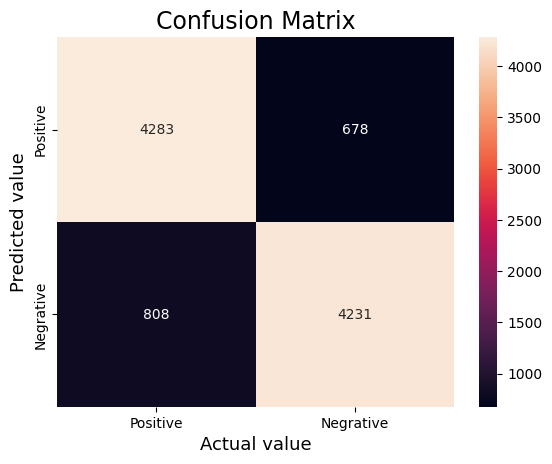

In [35]:
matrix = confusion_matrix(y_test,predictions)

#Plot the confusion matrix.
sns.heatmap(matrix,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negrative'],
            yticklabels=['Positive','Negrative'])

plt.ylabel('Predicted value',fontsize=13)
plt.xlabel('Actual value',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Almost 8514 values are predicted accurately while only
1486 values are not predicted right!

#Creating classification report

In [39]:
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



#Testing the model with example

In [89]:
def tester(review):
  sentence = cv_function.transform([review]).toarray()
  result = model3.predict(sentence)[0]
  if(result==1):
    return "Positive Review!"
  else:
    return "Negative Review!"
print("Review 1 "+tester("This movie was visually very appealing but the most attractive thing that I felt was the actors acting speacially in sad scenes.The actors are soo versatile and perfect cast"))
print("Review 2 "+tester("This movie was a clear waste of time. I left cenema before the movie ends. Acting skills were soo lame."))

Review 1 Positive Review!
Review 2 Negative Review!


# Saving our models

In [59]:
pickle.dump(model3,open('Movies_Reviews_Sentiment_Analysis_Model.pkl','wb'))